In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install keras
!pip install tensorflow

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [71]:
df = pd.read_csv('TSLA.csv')
df1 = pd.read_csv('TSLA.csv')
df2 = pd.read_csv('TSLA.csv')
df3 = pd.read_csv('TSLA.csv')

In [72]:
df.shape

(2392, 7)

In [73]:
df1.shape

(2392, 7)

In [74]:
df2.shape

(2392, 7)

In [75]:
df3.shape

(2392, 7)

In [76]:
df = df['Open'].values
df = df.reshape(-1, 1)
df1 = df1['Close'].values
df1 = df1.reshape(-1,1)
df2 = df2['High'].values
df2 = df2.reshape(-1, 1)
df3 = df3['Low'].values
df3 = df3.reshape(-1,1)

In [77]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
dataset_train1 = np.array(df1[:int(df1.shape[0]*0.8)])
dataset_test1 = np.array(df1[int(df1.shape[0]*0.8):])
dataset_train2 = np.array(df2[:int(df2.shape[0]*0.8)])
dataset_test2 = np.array(df2[int(df2.shape[0]*0.8):])
dataset_train3 = np.array(df3[:int(df3.shape[0]*0.8)])
dataset_test3 = np.array(df3[int(df3.shape[0]*0.8):])

In [78]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)
dataset_train1 = scaler.fit_transform(dataset_train1)
dataset_test1 = scaler.transform(dataset_test1)
dataset_train2 = scaler.fit_transform(dataset_train2)
dataset_test2 = scaler.transform(dataset_test2)
dataset_train3 = scaler.fit_transform(dataset_train3)
dataset_test3 = scaler.transform(dataset_test3)

In [79]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [80]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
x_train1, y_train1 = create_dataset(dataset_train1)
x_test1, y_test1 = create_dataset(dataset_test1)
x_train2, y_train2 = create_dataset(dataset_train2)
x_test2, y_test2 = create_dataset(dataset_test2)
x_train3, y_train3 = create_dataset(dataset_train3)
x_test3, y_test3 = create_dataset(dataset_test3)

In [81]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1))
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1))

In [82]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model1 = Sequential()
model1.add(LSTM(units=96, return_sequences=True, input_shape=(x_train1.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96))
model1.add(Dropout(0.2))
model1.add(Dense(units=1))
model2 = Sequential()
model2.add(LSTM(units=96, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=96,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=96,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=96))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))
model3 = Sequential()
model3.add(LSTM(units=96, return_sequences=True, input_shape=(x_train3.shape[1], 1)))
model3.add(Dropout(0.2))
model3.add(LSTM(units=96,return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(units=96,return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(units=96))
model3.add(Dropout(0.2))
model3.add(Dense(units=1))

In [83]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1))
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1))

In [84]:
model.compile(loss='mean_squared_error', optimizer='adam')
model1.compile(loss='mean_squared_error', optimizer='adam')
model2.compile(loss='mean_squared_error', optimizer='adam')
model3.compile(loss='mean_squared_error', optimizer='adam')

In [85]:
model.fit(x_train, y_train, epochs=100, batch_size=64)
model.save('stock_prediction.h5')

Epoch 1/100
30/30 [==============================] - 11s 223ms/step - loss: 0.0341
Epoch 2/100
30/30 [==============================] - 7s 220ms/step - loss: 0.0053
Epoch 3/100
30/30 [==============================] - 6s 215ms/step - loss: 0.0041
Epoch 4/100
30/30 [==============================] - 6s 216ms/step - loss: 0.0033
Epoch 5/100
30/30 [==============================] - 7s 226ms/step - loss: 0.0034
Epoch 6/100
30/30 [==============================] - 7s 237ms/step - loss: 0.0033
Epoch 7/100
30/30 [==============================] - 7s 237ms/step - loss: 0.0031
Epoch 8/100
30/30 [==============================] - 7s 241ms/step - loss: 0.0029
Epoch 9/100
30/30 [==============================] - 7s 225ms/step - loss: 0.0027
Epoch 10/100
30/30 [==============================] - 7s 222ms/step - loss: 0.0029
Epoch 11/100
30/30 [==============================] - 6s 212ms/step - loss: 0.0027
Epoch 12/100
30/30 [==============================] - 7s 217ms/step - loss: 0.0025
Epoch 13/100

In [86]:
model1.fit(x_train1, y_train1, epochs=100, batch_size=64)
model1.save('stock_prediction1.h5')

Epoch 1/100
30/30 [==============================] - 10s 195ms/step - loss: 0.0286
Epoch 2/100
30/30 [==============================] - 6s 191ms/step - loss: 0.0041
Epoch 3/100
30/30 [==============================] - 6s 189ms/step - loss: 0.0037
Epoch 4/100
30/30 [==============================] - 6s 191ms/step - loss: 0.0031
Epoch 5/100
30/30 [==============================] - 6s 190ms/step - loss: 0.0033
Epoch 6/100
30/30 [==============================] - 6s 191ms/step - loss: 0.0030
Epoch 7/100
30/30 [==============================] - 6s 191ms/step - loss: 0.0028
Epoch 8/100
30/30 [==============================] - 6s 190ms/step - loss: 0.0026
Epoch 9/100
30/30 [==============================] - 6s 191ms/step - loss: 0.0025
Epoch 10/100
30/30 [==============================] - 6s 191ms/step - loss: 0.0029
Epoch 11/100
30/30 [==============================] - 6s 191ms/step - loss: 0.0026
Epoch 12/100
30/30 [==============================] - 6s 192ms/step - loss: 0.0031
Epoch 13/100

In [87]:
model2.fit(x_train2, y_train2, epochs=100, batch_size=64)
model2.save('stock_prediction2.h5')

Epoch 1/100
30/30 [==============================] - 11s 204ms/step - loss: 0.0266
Epoch 2/100
30/30 [==============================] - 6s 211ms/step - loss: 0.0039
Epoch 3/100
30/30 [==============================] - 6s 210ms/step - loss: 0.0036
Epoch 4/100
30/30 [==============================] - 6s 205ms/step - loss: 0.0035
Epoch 5/100
30/30 [==============================] - 6s 196ms/step - loss: 0.0029
Epoch 6/100
30/30 [==============================] - 6s 204ms/step - loss: 0.0029
Epoch 7/100
30/30 [==============================] - 6s 193ms/step - loss: 0.0027
Epoch 8/100
30/30 [==============================] - 6s 189ms/step - loss: 0.0027
Epoch 9/100
30/30 [==============================] - 6s 189ms/step - loss: 0.0025
Epoch 10/100
30/30 [==============================] - 6s 191ms/step - loss: 0.0024
Epoch 11/100
30/30 [==============================] - 6s 189ms/step - loss: 0.0022
Epoch 12/100
30/30 [==============================] - 6s 189ms/step - loss: 0.0023
Epoch 13/100

In [88]:
model3.fit(x_train3, y_train3, epochs=100, batch_size=64)
model3.save('stock_prediction3.h5')

Epoch 1/100
30/30 [==============================] - 13s 241ms/step - loss: 0.0358
Epoch 2/100
30/30 [==============================] - 7s 242ms/step - loss: 0.0052
Epoch 3/100
30/30 [==============================] - 7s 222ms/step - loss: 0.0035
Epoch 4/100
30/30 [==============================] - 7s 224ms/step - loss: 0.0033
Epoch 5/100
30/30 [==============================] - 7s 221ms/step - loss: 0.0032
Epoch 6/100
30/30 [==============================] - 7s 220ms/step - loss: 0.0030
Epoch 7/100
30/30 [==============================] - 7s 221ms/step - loss: 0.0030
Epoch 8/100
30/30 [==============================] - 7s 220ms/step - loss: 0.0032
Epoch 9/100
30/30 [==============================] - 7s 220ms/step - loss: 0.0030
Epoch 10/100
30/30 [==============================] - 7s 220ms/step - loss: 0.0025
Epoch 11/100
30/30 [==============================] - 7s 220ms/step - loss: 0.0028
Epoch 12/100
30/30 [==============================] - 7s 221ms/step - loss: 0.0029
Epoch 13/100

In [89]:
model = load_model('stock_prediction.h5')
model1 = load_model('stock_prediction1.h5')
model2 = load_model('stock_prediction2.h5')
model3 = load_model('stock_prediction3.h5')

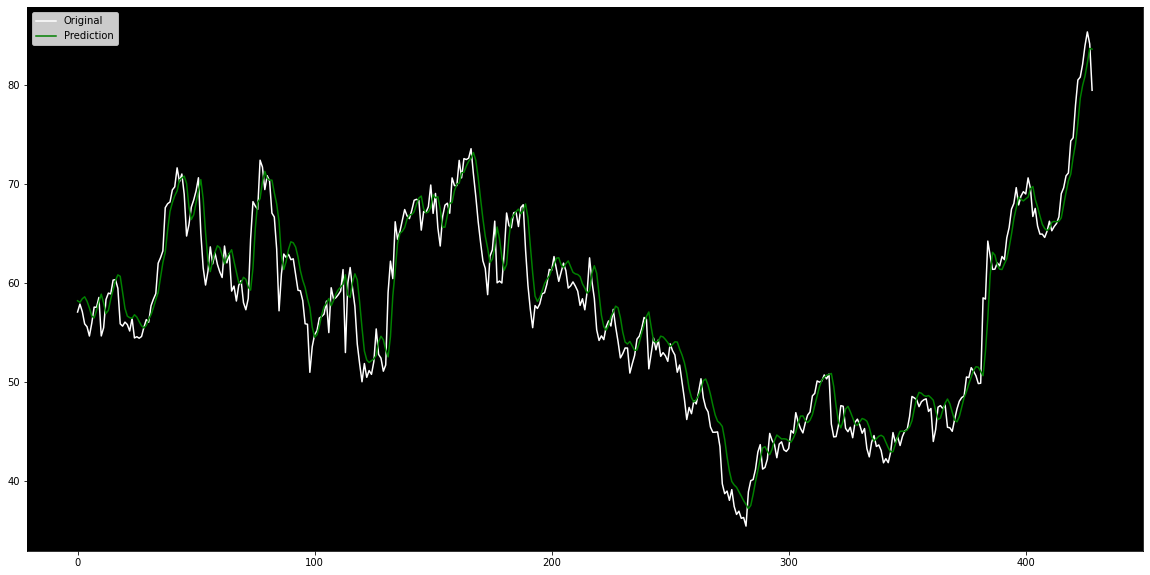

In [90]:
#Open Prediction
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(20,10))
ax.set_facecolor('#000000')
ax.plot(y_test_scaled, color='white', label='Original')
plt.plot(predictions, color='green', label='Prediction')
plt.legend()


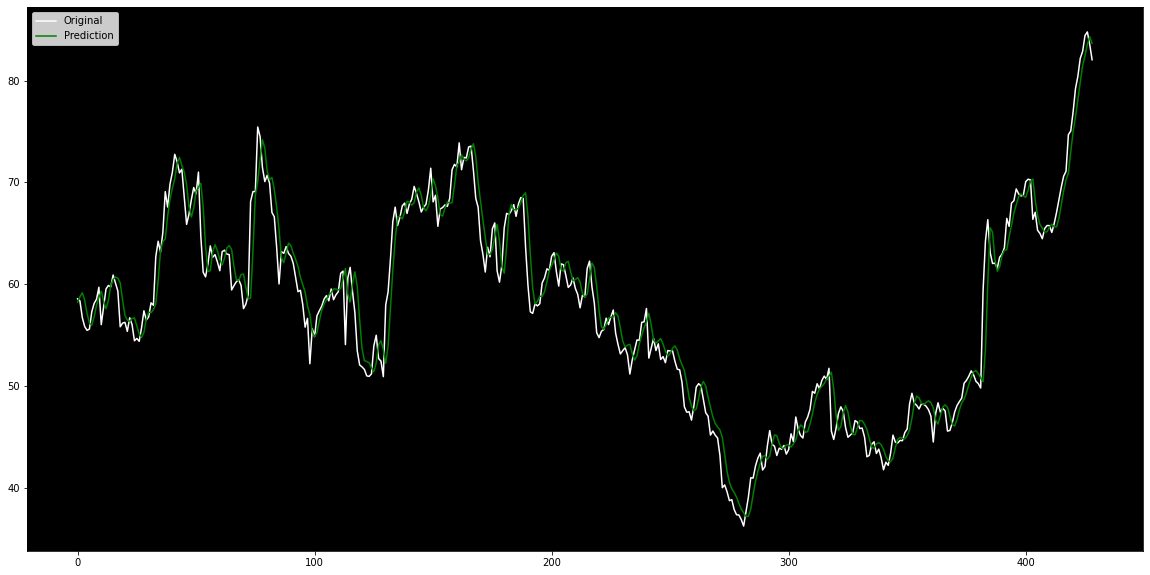

In [91]:
#High Prediction
predictions2 = model2.predict(x_test2)
predictions2 = scaler.inverse_transform(predictions2)
y_test_scaled2 = scaler.inverse_transform(y_test2.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(20,10))
ax.set_facecolor('#000000')
ax.plot(y_test_scaled2, color='white', label='Original')
plt.plot(predictions2, color='green', label='Prediction')
plt.legend()

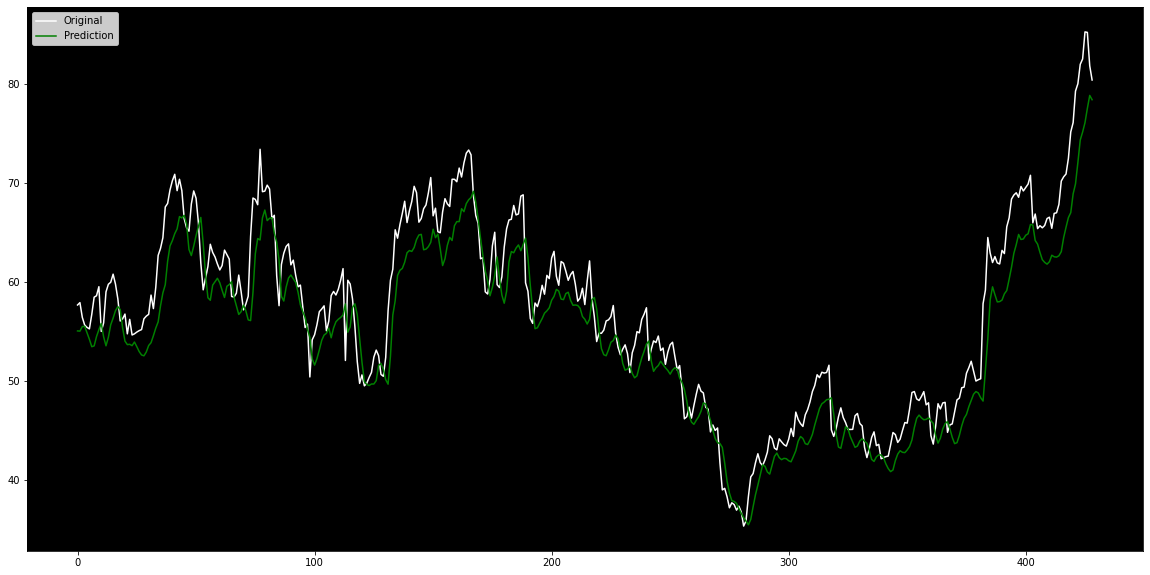

In [92]:
#Low Prediction
predictions3 = model3.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)
y_test_scaled3 = scaler.inverse_transform(y_test3.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(20,10))
ax.set_facecolor('#000000')
ax.plot(y_test_scaled3, color='white', label='Original')
plt.plot(predictions3, color='green', label='Prediction')
plt.legend()

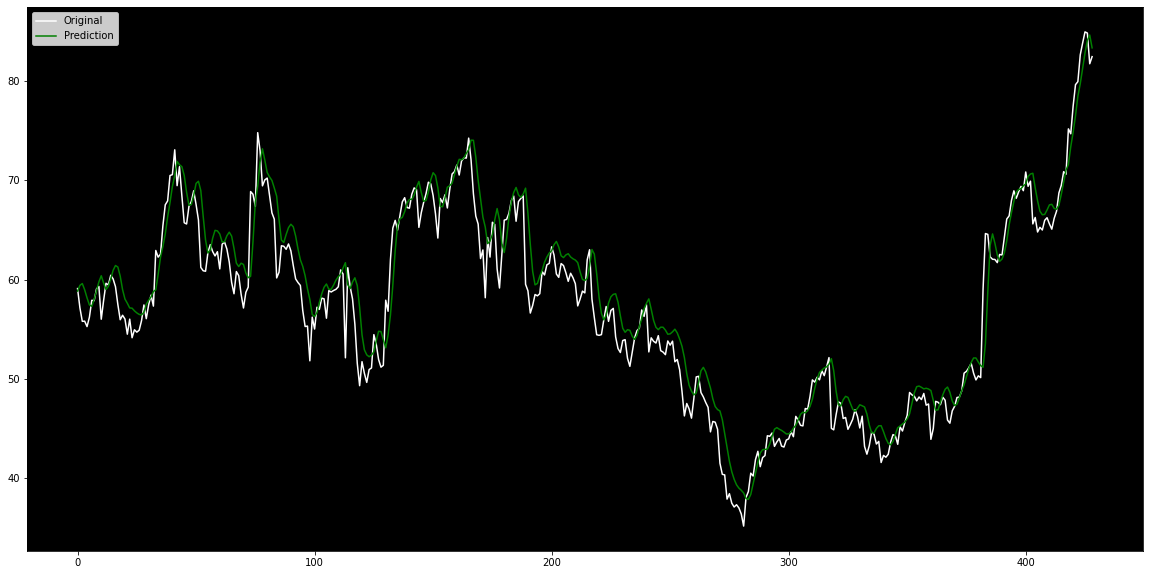

In [93]:
#Closed Prediction
predictions1 = model1.predict(x_test1)
predictions1 = scaler.inverse_transform(predictions1)
y_test_scaled1 = scaler.inverse_transform(y_test1.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(20,10))
ax.set_facecolor('#000000')
ax.plot(y_test_scaled1, color='white', label='Original')
plt.plot(predictions1, color='green', label='Prediction')
plt.legend()

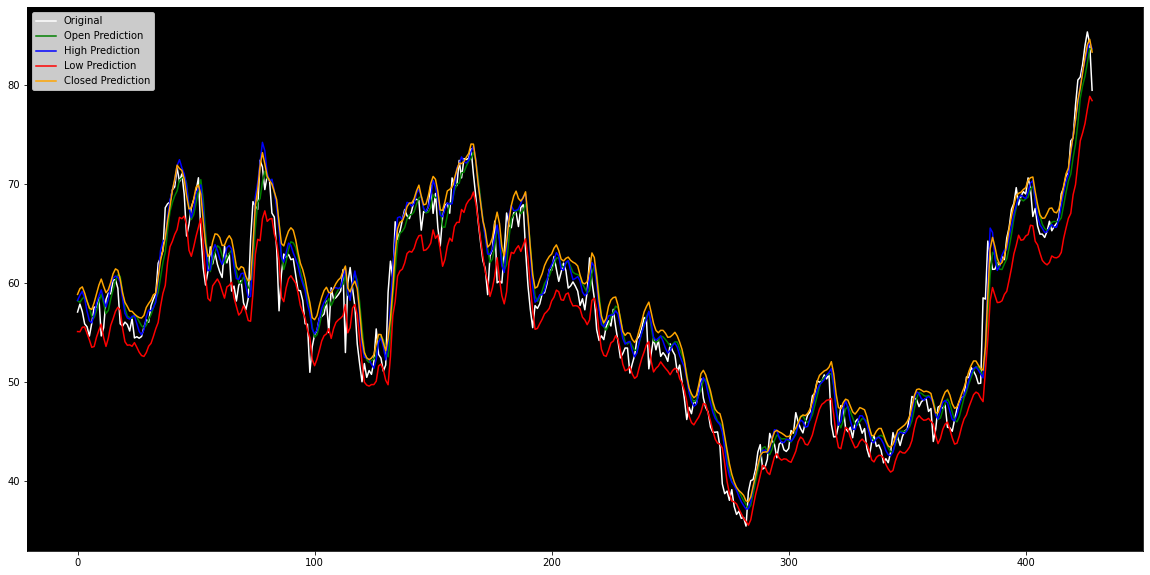

In [94]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_facecolor('#000000')
ax.plot(y_test_scaled, color='white', label='Original')
plt.plot(predictions, color='green', label='Open Prediction')
plt.plot(predictions2, color='blue', label='High Prediction')
plt.plot(predictions3, color='red', label='Low Prediction')
plt.plot(predictions1, color='orange', label='Closed Prediction')
plt.legend()